In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = pd.read_csv('./agaricus-lepiota.csv')
data.pop('edibility')
dummies = pd.get_dummies(data)
data.head()


,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


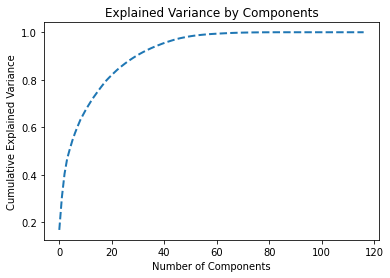

In [3]:
pca = PCA()
pca.fit(dummies)
amount = len(pca.explained_variance_ )
plt.figure()
plt.plot(range(0, amount), pca.explained_variance_ratio_.cumsum(), linestyle='--', linewidth=2)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

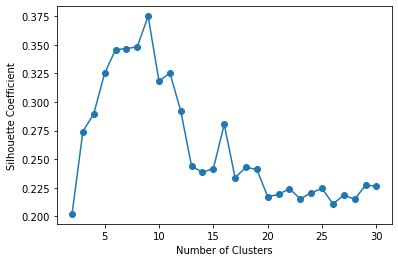

In [4]:
pca = PCA(n_components=20)
df_pca = pca.fit_transform(dummies)
sc = []
for i in range(2, 31):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++')
    kmeans_pca.fit(df_pca)
    sc.append(metrics.silhouette_score(df_pca, kmeans_pca.labels_, metric='euclidean'))
plt.figure()
plt.plot(range(2,31), sc, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [5]:
n = 7
sc = np.array(sc)
idx = np.argpartition(sc, -n)[-n:]
indices = idx[np.argsort((-sc)[idx])] + 2
print(indices)

[ 9  8  7  6 11  5 10]


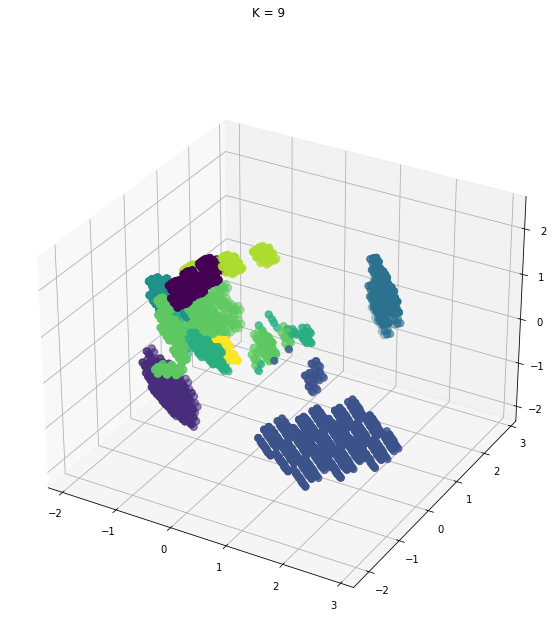

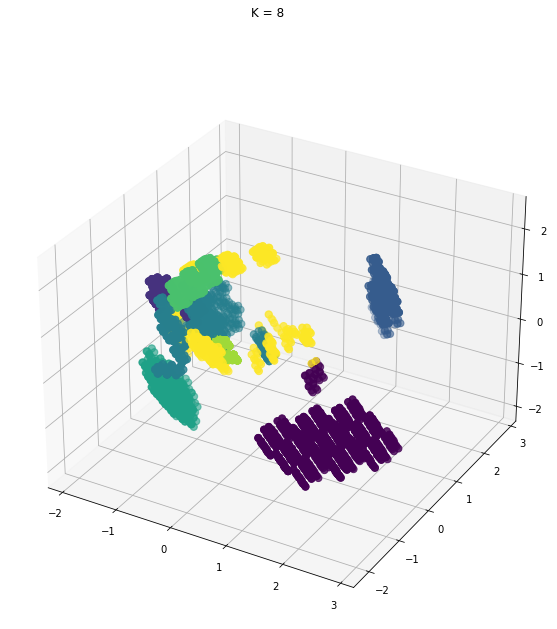

In [7]:
k = indices[0]
labels = KMeans(n_clusters=k).fit_predict(df_pca)
pca = PCA(n_components=3)
x_plot = np.array(pca.fit_transform(dummies))
fig = plt.figure(figsize=(10,10))
fig.suptitle(f"K = {k} ")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50, cmap='viridis')

k = indices[1]
labels = KMeans(n_clusters=k).fit_predict(df_pca)
pca = PCA(n_components=3)
x_plot = np.array(pca.fit_transform(dummies))
fig = plt.figure(figsize=(10,10))
fig.suptitle(f"K = {k} ")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50, cmap='viridis')